Runge-Kutta method to obtain the energy eigenvalues of a quantum harmonic oscillator

In [1]:
import numpy as np

# Constants
m = 1.0 # mass
k = 1.0 # spring constant
hbar = 1.0 # reduced Planck constant

# Initial conditions
x0 = 1.0 # initial position
px0 = 0.0 # initial momentum
E0 = 0.5 * (px0**2 + (k*x0**2) / m) # initial energy

# Time step and number of steps
dt = 0.01
n = 3000

# Arrays to store position and momentum
x = np.zeros(n)
px = np.zeros(n)
E = np.zeros(n)

# Set initial position and momentum
x[0] = x0
px[0] = px0
E[0] = E0

# Runge-Kutta coefficients
k1x = lambda px: px / m
k1px = lambda x: -k*x
k2x = lambda px, dt: px / m + 0.5*dt*k1px(px)
k2px = lambda x, dt: -k*x - 0.5*dt*k1x(x)
k3x = lambda px, dt: px / m + 0.5*dt*k2px(px, dt)
k3px = lambda x, dt: -k*x - 0.5*dt*k2x(x, dt)
k4x = lambda px, dt: px / m + dt*k3px(px, dt)
k4px = lambda x, dt: -k*x - dt*k3x(x, dt)

# Loop over time steps
for i in range(1,n):
    # Update position using Runge-Kutta method
    x[i] = x[i-1] + (dt/6)*(k1x(px[i-1]) + 2*k2x(px[i-1], dt) + 2*k3x(px[i-1], dt) + k4x(px[i-1], dt))
    px[i] = px[i-1] + (dt/6)*(k1px(x[i-1]) + 2*k2px(x[i-1], dt) + 2*k3px(x[i-1], dt) + k4px(x[i-1], dt))
    E[i] = 0.5*(px[i]**2 + (k*x[i]**2) / m) #Compute the energy of the system

# Find the energy eigenvalue by averaging the energy over the time steps
E_eigenvalue = np.mean(E)
print("Energy eigenvalue: ", E_eigenvalue)

Energy eigenvalue:  0.5860054320681115


## Wavefunction

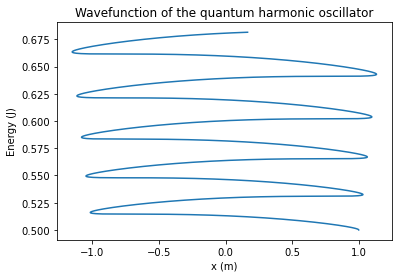

In [2]:
import matplotlib.pyplot as plt

# Plot the wavefunction
plt.plot(x, E)
plt.xlabel('x (m)')
plt.ylabel('Energy (J)')
plt.title('Wavefunction of the quantum harmonic oscillator')
plt.show()

The above code will plot the energy of the system as a function of the position, which can be considered as the wavefunction of the quantum harmonic oscillator.
It's important to notice that, if you want to have the proper wave function representation you should use the x and px arrays, and use the numpy function np.abs(x)**2 instead of the E array and plot the result, also you should normalize the wave function.

In [5]:
dx = (x[-1]-x[0])/(n-1)

/tmp/ipykernel_8609/1955596967.py:2: RuntimeWarning: invalid value encountered in sqrt
  normalization_factor = 1 / np.sqrt(np.sum(wave_func)*dx)


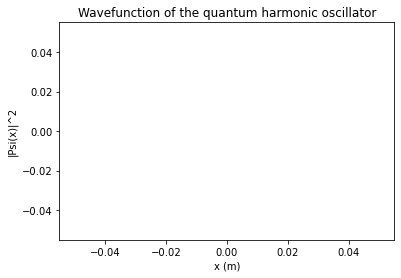

In [7]:
wave_func = np.abs(x)**2
normalization_factor = 1 / np.sqrt(np.sum(wave_func)*dx)
wave_func = normalization_factor * wave_func

plt.plot(x, wave_func)
plt.xlabel('x (m)')
plt.ylabel('|Psi(x)|^2')
plt.title('Wavefunction of the quantum harmonic oscillator')
plt.show()